In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics  import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler


In [3]:
df=pd.read_csv('creditcard.csv')
print('Lets look ahead at the details')
df.head()
print('Data Info')
df.info()

Lets look ahead at the details
Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20    

In [4]:
pd.set_option('display.max_columns',100)
print("Credit Card Fraud Detection data - rows:",df.shape[0],"columns:",df.shape[1])
class_counts=df['Class'].value_counts()

Credit Card Fraud Detection data - rows: 284807 columns: 31


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
total= df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total,percent],axis=1,keys=['Total','Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



 Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


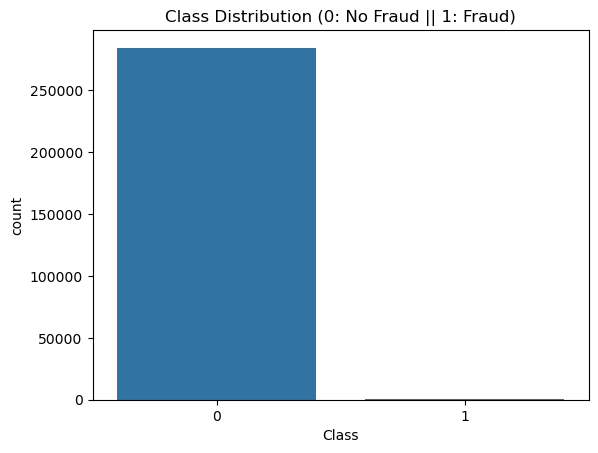

In [7]:
#Lets check data unbalance with respect with target value ,i.e Class

temp=df["Class"].value_counts()
print("\n Class Distribution:")
print(temp)

# Visualize this 
sns.countplot(x='Class',data=df)
plt.title('Class Distribution (0: No Fraud || 1: Fraud)')
plt.show()
df=pd.DataFrame({'Class': temp.index,'values':temp.values})


In [8]:
# Reload the original data to get 'Amount' and 'Time' columns back
df_raw = pd.read_csv('creditcard.csv')

scaler = StandardScaler()

# Rescale the 'Amount' and 'Time' columns
df_raw['scaled_amount'] = scaler.fit_transform(df_raw['Amount'].values.reshape(-1, 1))
df_raw['scaled_time'] = scaler.fit_transform(df_raw['Time'].values.reshape(-1, 1))

# Drop the original 'Time' and 'Amount' columns
df_raw.drop(['Time', 'Amount'], axis=1, inplace=True)

# df_raw now contains the scaled columns and can be used for further processing



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE, Fraud cases:", sum(y_train == 1))
print("After SMOTE, Non-Fraud cases:", sum(y_train == 0))

In [9]:
#transactions in time (using scaled_time)
class_0 = df_raw.loc[df_raw['Class'] == 0]["scaled_time"]
class_1 = df_raw.loc[df_raw['Class'] == 1]["scaled_time"]

hist_data = [class_0, class_1]
group_labels = ['NOT-Fraud', 'Fraud']

import plotly.figure_factory as ff
from plotly.offline import iplot

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='CREDIT-CARD TRANSACTIONS TIME DENSITY PLOT', xaxis=dict(title='SCALED TIME'))
iplot(fig, filename='dist_only')

In [10]:
X=df.drop('Class',axis=1)
y=df['Class']

In [11]:
# Use the original data for splitting
X_raw = df_raw.drop('Class', axis=1)
y_raw = df_raw['Class']
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, random_state=42, test_size=0.2, stratify=y_raw)

In [12]:
# we will manually undersample the traning dataset 
# First concatenate the training data back together

train_data = pd.concat([X_train, y_train], axis=1)

# separate the fraud cases and non-fraud cases
fraud_cases=train_data[train_data['Class']==1]
non_fraud_cases=train_data[train_data['Class']==0]

#randomly sample the non-fraud cases match with the fraud cases 
non_fraud_sample=non_fraud_cases.sample(n=len(fraud_cases),random_state=42)

#combine the fraud cases and non fraud cases 
balanced_df=pd.concat([fraud_cases,non_fraud_sample])

#shufflie the new balanced dataframe to mix the rows
balanced_df=balanced_df.sample(frac=1,random_state=42).reset_index(drop=True)

print("\n New balanced dataset distribution :")
print(balanced_df['Class'].value_counts())

X_train_balanced=balanced_df.drop('Class',axis=1)
y_train_balanced=balanced_df['Class']




 New balanced dataset distribution :
Class
0    394
1    394
Name: count, dtype: int64


In [13]:
#Create the Logistic Regression model
model=LogisticRegression()

#Train the model using our BALANCIND TRAINING DATA
model.fit(X_train_balanced,y_train_balanced)

print("\n Model Trained successfuly!")



 Model Trained successfuly!



 Confusion Matrix:
[[54613  2251]
 [    8    90]]


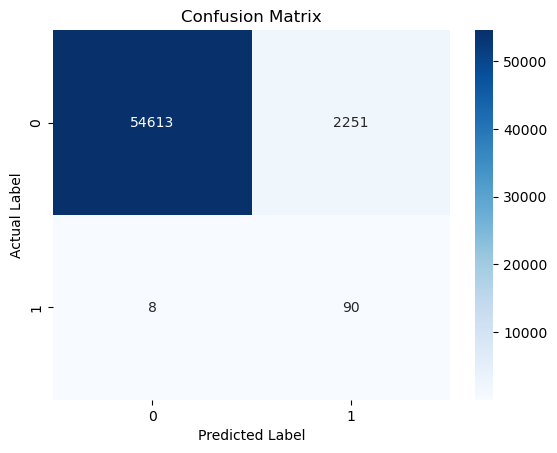

In [14]:
# Make predictions on the test data
y_pred=model.predict(X_test)

# --- The Confusion Matrix ---
# This is the best way to see the results
print("\n Confusion Matrix:")
cm=confusion_matrix(y_test,y_pred)
print(cm)

#Let's visualize it
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [15]:
print("\nClassification Report :")
print(classification_report(y_test,y_pred))


Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

